# MNIST

In [13]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
import numpy as np
tf.compat.v1.reset_default_graph()

class MNISTLoader():
    def __init__(self):
        mnist = tf.keras.datasets.mnist
        (self.train_data, self.train_label), (self.test_data, self.test_label) = mnist.load_data()

        self.train_data = np.expand_dims(self.train_data.astype(np.float32) / 255.0, axis=-1)      # [60000, 28, 28, 1]
        self.test_data = np.expand_dims(self.test_data.astype(np.float32) / 255.0, axis=-1)        # [10000, 28, 28, 1]
        self.train_label = self.train_label.astype(np.int32)    # [60000]
        self.test_label = self.test_label.astype(np.int32)      # [10000]
        self.num_train_data, self.num_test_data = self.train_data.shape[0], self.test_data.shape[0]

    def get_batch(self, batch_size):

        index = np.random.randint(0, self.num_train_data, batch_size)
        return self.train_data[index, :], self.train_label[index]

class CNN(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.conv1 = tf.keras.layers.Conv2D(
            filters=32,             # 卷積層神經元（卷積核）數目
            kernel_size=[5, 5],     # 接受區的大小
            padding='same',         # padding策略（vaild 或 same）
            activation=tf.nn.relu   # 激活函数

        )
        self.pool1 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.conv2 = tf.keras.layers.Conv2D(
            filters=64,
            kernel_size=[5, 5],
            padding='same',
            activation=tf.nn.relu
        )
        self.pool2 = tf.keras.layers.MaxPool2D(pool_size=[2, 2], strides=2)
        self.flatten = tf.keras.layers.Reshape(target_shape=(7 * 7 * 64,))
        self.dense1 = tf.keras.layers.Dense(units=1024, activation=tf.nn.relu)
        self.dense2 = tf.keras.layers.Dense(units=10)

    def call(self, inputs):
        x = self.conv1(inputs)                  # [batch_size, 28, 28, 1]
        x = self.pool1(x)                       # [batch_size, 14, 14, 32]
        x = self.conv2(x)                       # [batch_size, 14, 14, 64]
        x = self.pool2(x)                       # [batch_size, 7, 7, 64]
        x = self.flatten(x)                     # [batch_size, 7 * 7 * 64]
        x = self.dense1(x)                      # [batch_size, 1024]
        x = self.dense2(x)                      # [batch_size, 10]
        output = tf.nn.softmax(x)
        return output

num_epochs = 1
batch_size = 50
learning_rate = 0.01

data_loader = MNISTLoader()
model = CNN()
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
#print(model.summary())
num_batches = int(data_loader.num_train_data // batch_size * num_epochs)
for batch_index in range(num_batches):
    X, y = data_loader.get_batch(batch_size)
    with tf.GradientTape() as tape:
        y_pred = model(X)
        loss = tf.keras.losses.sparse_categorical_crossentropy(y_true=y, y_pred=y_pred)
        loss = tf.reduce_mean(loss)
        print("batch %d: loss %f" % (batch_index, loss.numpy()))
    grads = tape.gradient(loss, model.variables)
    optimizer.apply_gradients(grads_and_vars=zip(grads, model.variables))

batch 0: loss 2.317187
batch 1: loss 10.022873
batch 2: loss 3.248734
batch 3: loss 2.325327
batch 4: loss 2.283678
batch 5: loss 2.327276
batch 6: loss 2.324011
batch 7: loss 2.288464
batch 8: loss 2.304582
batch 9: loss 2.293455
batch 10: loss 2.314826
batch 11: loss 2.317631
batch 12: loss 2.303098
batch 13: loss 2.301352
batch 14: loss 2.277559
batch 15: loss 2.295424
batch 16: loss 2.288870
batch 17: loss 2.256877
batch 18: loss 2.209583
batch 19: loss 2.160286
batch 20: loss 2.095062
batch 21: loss 1.973585
batch 22: loss 1.864602
batch 23: loss 1.640425
batch 24: loss 1.663045
batch 25: loss 1.381280
batch 26: loss 1.347274
batch 27: loss 1.036076
batch 28: loss 0.985329
batch 29: loss 0.812384
batch 30: loss 1.003845
batch 31: loss 0.784617
batch 32: loss 0.854651
batch 33: loss 1.164917
batch 34: loss 0.497708
batch 35: loss 0.738226
batch 36: loss 0.602548
batch 37: loss 0.431996
batch 38: loss 0.492866
batch 39: loss 0.700036
batch 40: loss 0.657490
batch 41: loss 0.791205
b

batch 335: loss 0.281540
batch 336: loss 0.051522
batch 337: loss 0.094567
batch 338: loss 0.093966
batch 339: loss 0.090827
batch 340: loss 0.027726
batch 341: loss 0.124484
batch 342: loss 0.082015
batch 343: loss 0.209700
batch 344: loss 0.410719
batch 345: loss 0.175243
batch 346: loss 0.199631
batch 347: loss 0.021123
batch 348: loss 0.065594
batch 349: loss 0.057115
batch 350: loss 0.087690
batch 351: loss 0.044010
batch 352: loss 0.096969
batch 353: loss 0.024391
batch 354: loss 0.049978
batch 355: loss 0.233705
batch 356: loss 0.031863
batch 357: loss 0.032906
batch 358: loss 0.160992
batch 359: loss 0.022417
batch 360: loss 0.315676
batch 361: loss 0.460255
batch 362: loss 0.129522
batch 363: loss 0.149198
batch 364: loss 0.150464
batch 365: loss 0.046716
batch 366: loss 0.100818
batch 367: loss 0.248765
batch 368: loss 0.094800
batch 369: loss 0.134849
batch 370: loss 0.041962
batch 371: loss 0.134265
batch 372: loss 0.063800
batch 373: loss 0.058799
batch 374: loss 0.093646


batch 663: loss 0.033346
batch 664: loss 0.124102
batch 665: loss 0.039860
batch 666: loss 0.077659
batch 667: loss 0.066582
batch 668: loss 0.149695
batch 669: loss 0.125798
batch 670: loss 0.073980
batch 671: loss 0.049997
batch 672: loss 0.071760
batch 673: loss 0.018796
batch 674: loss 0.126991
batch 675: loss 0.074055
batch 676: loss 0.002361
batch 677: loss 0.075395
batch 678: loss 0.084178
batch 679: loss 0.077460
batch 680: loss 0.220672
batch 681: loss 0.102208
batch 682: loss 0.273275
batch 683: loss 0.083689
batch 684: loss 0.310189
batch 685: loss 0.063690
batch 686: loss 0.014600
batch 687: loss 0.075514
batch 688: loss 0.016963
batch 689: loss 0.023203
batch 690: loss 0.057169
batch 691: loss 0.104400
batch 692: loss 0.115086
batch 693: loss 0.073118
batch 694: loss 0.263560
batch 695: loss 0.132621
batch 696: loss 0.107522
batch 697: loss 0.006424
batch 698: loss 0.330519
batch 699: loss 0.088997
batch 700: loss 0.001025
batch 701: loss 0.036165
batch 702: loss 0.039487


batch 991: loss 0.015580
batch 992: loss 0.031924
batch 993: loss 0.326009
batch 994: loss 0.080229
batch 995: loss 0.001304
batch 996: loss 0.196471
batch 997: loss 0.028607
batch 998: loss 0.068562
batch 999: loss 0.067263
batch 1000: loss 0.003930
batch 1001: loss 0.029527
batch 1002: loss 0.112915
batch 1003: loss 0.028555
batch 1004: loss 0.110028
batch 1005: loss 0.097156
batch 1006: loss 0.098515
batch 1007: loss 0.033063
batch 1008: loss 0.116329
batch 1009: loss 0.089910
batch 1010: loss 0.073501
batch 1011: loss 0.001942
batch 1012: loss 0.015027
batch 1013: loss 0.011383
batch 1014: loss 0.222215
batch 1015: loss 0.037850
batch 1016: loss 0.027179
batch 1017: loss 0.071359
batch 1018: loss 0.086861
batch 1019: loss 0.023825
batch 1020: loss 0.057006
batch 1021: loss 0.093654
batch 1022: loss 0.033166
batch 1023: loss 0.117061
batch 1024: loss 0.128220
batch 1025: loss 0.120396
batch 1026: loss 0.106256
batch 1027: loss 0.002325
batch 1028: loss 0.024590
batch 1029: loss 0.00

###### sparse_categorical_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()
num_batches = int(data_loader.num_test_data // batch_size)
for batch_index in range(num_batches):
    start_index, end_index = batch_index * batch_size, (batch_index + 1) * batch_size
    y_pred = model.predict(data_loader.test_data[start_index: end_index])
    sparse_categorical_accuracy.update_state(y_true=data_loader.test_label[start_index: end_index], y_pred=y_pred)
print("test accuracy: %f" % sparse_categorical_accuracy.result())

# MNIST(keras)

In [3]:
from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
tf.compat.v1.reset_default_graph()


(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))


train_images, test_images = train_images / 255.0, test_images / 255.0

model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1450 - accuracy: 0.9549
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0468 - accuracy: 0.9853
Epoch 3/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0325 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0250 - accuracy: 0.9922
Epoch 5/5
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0196 - accuracy: 0.9934


In [5]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.0325 - accuracy: 0.9909


# Cifar10

In [6]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

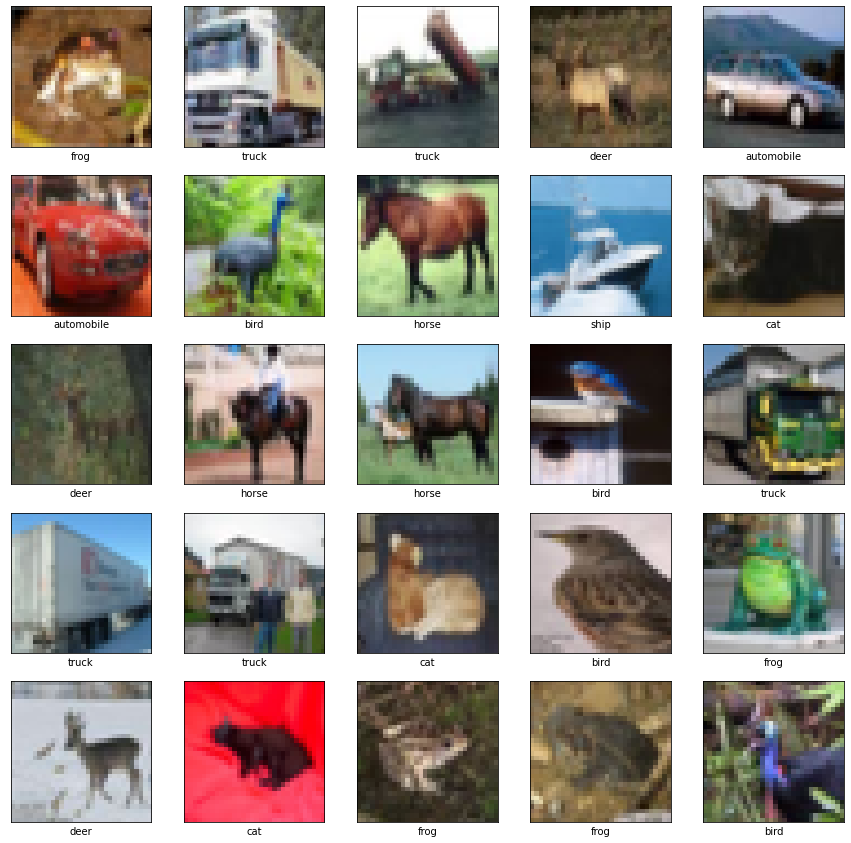

In [14]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [16]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 28s 17ms/step - loss: 1.4698 - accuracy: 0.4643 - val_loss: 1.2321 - val_accuracy: 0.5487
Epoch 2/10
1563/1563 [==============================] - 26s 17ms/step - loss: 1.1180 - accuracy: 0.6050 - val_loss: 1.0574 - val_accuracy: 0.6280
Epoch 3/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.9715 - accuracy: 0.6600 - val_loss: 0.9501 - val_accuracy: 0.6703
Epoch 4/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8756 - accuracy: 0.6950 - val_loss: 1.1067 - val_accuracy: 0.6299
Epoch 5/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8015 - accuracy: 0.7202 - val_loss: 0.8799 - val_accuracy: 0.6953
Epoch 6/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7393 - accuracy: 0.7408 - val_loss: 0.8584 - val_accuracy: 0.7079
Epoch 7/10
1563/1563 [==============================] - 33s 21ms/step - loss: 0.6836 - accuracy: 0.7617 - val_loss: 0.8482 -

313/313 - 2s - loss: 0.8864 - accuracy: 0.7144 - 2s/epoch - 5ms/step
0.7143999934196472


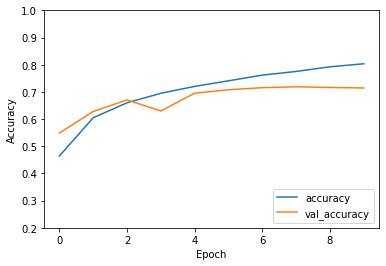

In [18]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

# Read Own Dataset

In [1]:
import tensorflow as tf
 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
import os
import numpy as np
import matplotlib.pyplot as plt

# dimensions of our images.
img_width, img_height = 150, 150

train_data_dir = 'data/train'
validation_data_dir = 'data/validation'
nb_train_samples = 2000
nb_validation_samples = 800
epochs = 10
batch_size = 16

# build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(img_width, img_height, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [2]:
# compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [3]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)


# class_mode = "binary" if # classes = 2 
# class_mode = "categorical" if # classes >= 2
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [4]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
125/125 [==============================] - 37s 294ms/step - loss: 0.7166 - accuracy: 0.5220 - val_loss: 0.7462 - val_accuracy: 0.5000
Epoch 2/10
125/125 [==============================] - 31s 252ms/step - loss: 0.6955 - accuracy: 0.4950 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
125/125 [==============================] - 31s 251ms/step - loss: 0.6946 - accuracy: 0.5400 - val_loss: 0.6600 - val_accuracy: 0.6000
Epoch 4/10
125/125 [==============================] - 31s 249ms/step - loss: 0.6660 - accuracy: 0.6010 - val_loss: 0.6369 - val_accuracy: 0.6187
Epoch 5/10
125/125 [==============================] - 31s 249ms/step - loss: 0.6366 - accuracy: 0.6530 - val_loss: 0.6337 - val_accuracy: 0.6338
Epoch 6/10
125/125 [==============================] - 31s 249ms/step - loss: 0.6187 - accuracy: 0.6720 - val_loss: 0.5937 - val_accuracy: 0.6750
Epoch 7/10
125/125 [==============================] - 

In [5]:
model.save('CNN_model.h5')

In [6]:
import tensorflow as tf

for cls, idx in train_generator.class_indices.items():
    print('Class #{} = {}'.format(idx, cls))
    
test_image = tf.keras.preprocessing.image.load_img('data/validation/dogs/dog.1010.jpg', target_size = (150, 150)) 
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = test_image /255.0
test_image = np.expand_dims(test_image, axis = 0)

#predict the result
result = model.predict(test_image)
print(result)

Class #0 = cats
Class #1 = dogs
[[0.04271266 0.47792825]]
